In [1]:
import pandas, numpy, seaborn

In [2]:
from cycler import cycler

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})

In [4]:
import cycler
colors = matplotlib.pyplot.get_cmap('tab20').colors
new_cycler = cycler.cycler(color=colors)
matplotlib.rcParams.update({'axes.prop_cycle':new_cycler})

# 0. user-defined variables

In [5]:
tpm_file = '/home/adrian/projects/brca2/results/tpm/DESeq2_TPM_values.tsv'

# 1. read info

In [6]:
tpm = pandas.read_csv(tpm_file, sep='\t', index_col=0)
print(tpm.shape)
tpm.head()

(40320, 11)


,H0060_92T,H2169_94T,H4750_92T,H5667_92T,H0343_03T,H3849_98T,H3974_03T,H5715_93T,H5767_01T,H6735_03T,H6933_91T
ENSG00000000003,0.421575,31.410170,7.611229,8.417437,10.477043,24.956372,39.308784,25.195223,16.826798,21.458924,13.399244
ENSG00000000005,0.000000,6.613008,0.056710,0.182798,0.000000,0.594497,0.708205,0.342461,0.000000,1.502382,0.318929
ENSG00000000419,3.041357,60.705722,26.397972,6.331159,38.170014,112.776487,73.919697,55.463430,55.270679,79.955202,18.222344
ENSG00000000457,0.178304,9.395761,3.452516,1.782599,3.108321,19.173526,13.196345,9.694715,9.428093,7.384273,1.840042
ENSG00000000460,0.378773,4.442874,3.143268,4.534687,8.616932,8.194707,5.280098,20.352876,7.238612,6.852222,3.747373


# 2. bring data to log2 TPM

In [7]:
log2_tpm_PO = numpy.log2(tpm + 1)
log2_tpm_PO.head()

,H0060_92T,H2169_94T,H4750_92T,H5667_92T,H0343_03T,H3849_98T,H3974_03T,H5715_93T,H5767_01T,H6735_03T,H6933_91T
ENSG00000000003,0.507490,5.018375,3.106219,3.235334,3.520679,4.698017,5.333022,4.711232,4.155976,4.489217,3.847921
ENSG00000000005,0.000000,2.928467,0.079580,0.242204,0.000000,0.673101,0.772481,0.424880,0.000000,1.323302,0.399367
ENSG00000000419,2.014840,5.947332,4.775997,2.874041,5.291678,6.830059,6.227273,5.819245,5.814311,6.339052,4.264712
ENSG00000000457,0.236712,3.377923,2.154621,1.476433,2.038549,4.334391,3.827448,3.418826,3.382403,3.067686,1.505912
ENSG00000000460,0.463385,2.444369,2.050769,2.468502,3.265577,3.200804,2.650787,4.416359,3.042401,2.973101,2.247129


# 3. histogram

74
18.110007371478915


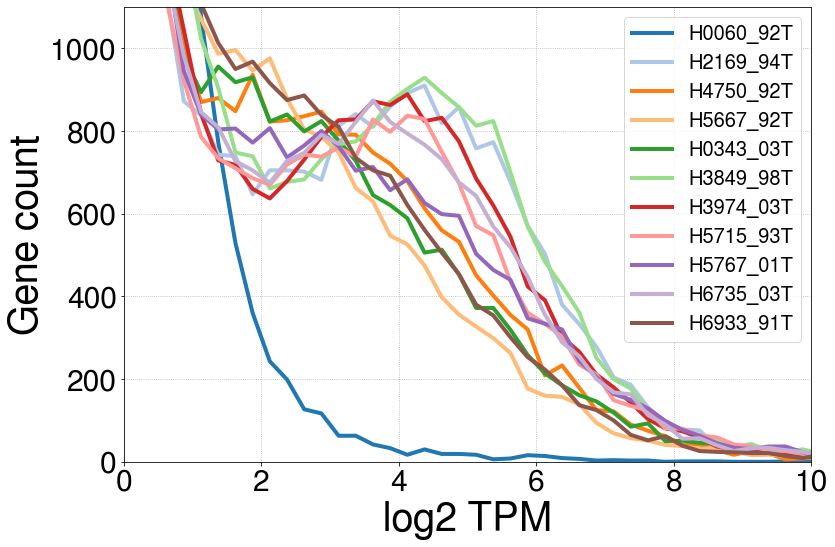

In [8]:
found_max = 18.5
number_of_bins = int(found_max*4)
print(number_of_bins)

absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()

for sample in working_samples:
    
    log2TPM = log2_tpm_PO.loc[:, sample]
    if max(log2TPM) > absolute_max:
        absolute_max = max(log2TPM)
        
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    #freq = hist/len(log2TPM)
    
    matplotlib.pyplot.plot(x, hist, lw=4, label=sample)
    #print(sample)
    #print(x)
    #print(hist)
    
matplotlib.pyplot.xlim([0, 10])
matplotlib.pyplot.ylim([0, 1100])

matplotlib.pyplot.xlabel('log2 TPM')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.legend()

matplotlib.pyplot.tight_layout()

print(absolute_max)

**Conclusions**

- Consider excluding H0060_92T for sure (dark blue)
- Consider also excluding H6933_91T (brown) and H0343_03T (green) and H5767_01T (purple).
- H5667_92T (orange) should also be excluded, but it is a -/-, so it is kept.
    - same for H5667_92T (light orange), but also kept bc of -/-.
- the only reliable -/- is H2169_94T.

In [9]:
print(working_samples)

['H0060_92T', 'H2169_94T', 'H4750_92T', 'H5667_92T', 'H0343_03T', 'H3849_98T', 'H3974_03T', 'H5715_93T', 'H5767_01T', 'H6735_03T', 'H6933_91T']


# 4. PCA

In [10]:
transpose = log2_tpm_PO.transpose()
transpose.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286231,ENSG00000286235,ENSG00000286237,ENSG00000286239,ENSG00000286243,ENSG00000286255,ENSG00000286261,ENSG00000286264,ENSG00000286265,ENSG00000286268
H0060_92T,0.507490,0.000000,2.014840,0.236712,0.463385,0.467657,0.365337,2.222868,0.679605,0.622358,...,0.000000,0.042724,0.000000,0.000000,0.0,0.0,0.202651,0.641740,0.0,0.000000
H2169_94T,5.018375,2.928467,5.947332,3.377923,2.444369,3.800017,6.430823,5.701985,4.072221,3.615227,...,0.639191,0.000000,0.213850,0.064636,0.0,0.0,3.089982,3.820526,0.0,0.101213
H4750_92T,3.106219,0.079580,4.775997,2.154621,2.050769,3.490685,3.164529,3.197940,2.915073,2.971390,...,0.000000,0.000000,0.286837,0.019992,0.0,0.0,2.171642,3.150534,0.0,0.026907
H5667_92T,3.235334,0.242204,2.874041,1.476433,2.468502,2.731482,3.868472,3.836962,1.323562,2.664295,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.522501,2.176582,0.0,0.000000
H0343_03T,3.520679,0.000000,5.291678,2.038549,3.265577,2.404019,3.297502,4.782033,2.139928,2.442778,...,0.000000,0.000000,0.000000,0.028109,0.0,0.0,1.976683,3.655653,0.0,0.000000


In [11]:
# remove low quality samples
strict = transpose.drop(index=['H0060_92T'])
print(strict.shape)
strict.head()

(10, 40320)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286231,ENSG00000286235,ENSG00000286237,ENSG00000286239,ENSG00000286243,ENSG00000286255,ENSG00000286261,ENSG00000286264,ENSG00000286265,ENSG00000286268
H2169_94T,5.018375,2.928467,5.947332,3.377923,2.444369,3.800017,6.430823,5.701985,4.072221,3.615227,...,0.639191,0.000000,0.213850,0.064636,0.0,0.0,3.089982,3.820526,0.0,0.101213
H4750_92T,3.106219,0.079580,4.775997,2.154621,2.050769,3.490685,3.164529,3.197940,2.915073,2.971390,...,0.000000,0.000000,0.286837,0.019992,0.0,0.0,2.171642,3.150534,0.0,0.026907
H5667_92T,3.235334,0.242204,2.874041,1.476433,2.468502,2.731482,3.868472,3.836962,1.323562,2.664295,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.522501,2.176582,0.0,0.000000
H0343_03T,3.520679,0.000000,5.291678,2.038549,3.265577,2.404019,3.297502,4.782033,2.139928,2.442778,...,0.000000,0.000000,0.000000,0.028109,0.0,0.0,1.976683,3.655653,0.0,0.000000
H3849_98T,4.698017,0.673101,6.830059,4.334391,3.200804,3.375498,5.951615,5.471994,4.950593,4.268917,...,0.091778,0.025331,0.240156,0.240330,0.0,0.0,3.245118,3.524629,0.0,0.344614


In [12]:
# remove genes that do not arrive to 10 tpm
threshold = numpy.log2(10+1)

substantial = strict.loc[:, strict.sum().ge(threshold)]

print(substantial.shape)
substantial.head(15)

(10, 20627)


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286140,ENSG00000286156,ENSG00000286169,ENSG00000286190,ENSG00000286192,ENSG00000286215,ENSG00000286219,ENSG00000286220,ENSG00000286261,ENSG00000286264
H2169_94T,5.018375,2.928467,5.947332,3.377923,2.444369,3.800017,6.430823,5.701985,4.072221,3.615227,...,3.170592,2.419384,1.231890,4.735853,0.827847,2.074017,3.107143,2.304402,3.089982,3.820526
H4750_92T,3.106219,0.079580,4.775997,2.154621,2.050769,3.490685,3.164529,3.197940,2.915073,2.971390,...,2.343720,1.023179,0.092559,3.696850,0.778184,0.939810,4.265571,2.083735,2.171642,3.150534
H5667_92T,3.235334,0.242204,2.874041,1.476433,2.468502,2.731482,3.868472,3.836962,1.323562,2.664295,...,1.591998,1.905573,0.042833,1.206248,0.646299,1.092980,2.816524,1.616656,2.522501,2.176582
H0343_03T,3.520679,0.000000,5.291678,2.038549,3.265577,2.404019,3.297502,4.782033,2.139928,2.442778,...,2.916630,1.512433,0.275987,2.028104,0.428382,0.818059,3.402233,0.951538,1.976683,3.655653
H3849_98T,4.698017,0.673101,6.830059,4.334391,3.200804,3.375498,5.951615,5.471994,4.950593,4.268917,...,2.197794,2.469884,0.500336,2.938275,1.225090,2.084248,3.968504,2.843090,3.245118,3.524629
H3974_03T,5.333022,0.772481,6.227273,3.827448,2.650787,2.673035,4.187501,4.421880,4.449650,4.254462,...,2.348419,2.808126,0.819788,2.893120,1.150820,1.377847,3.220944,1.673010,2.635189,3.119385
H5715_93T,4.711232,0.424880,5.819245,3.418826,4.416359,3.437694,4.093802,5.570677,4.083370,4.075906,...,2.861411,1.555220,0.380668,3.038436,1.066015,1.118199,3.315416,1.659500,2.122579,2.041672
H5767_01T,4.155976,0.000000,5.814311,3.382403,3.042401,1.582538,2.563500,3.959383,3.657053,3.785642,...,2.023737,2.916132,0.113296,1.237497,0.500417,0.844570,4.358563,2.356538,2.705331,3.880281
H6735_03T,4.489217,1.323302,6.339052,3.067686,2.973101,2.403838,3.970228,4.540521,4.174281,4.356769,...,2.637322,2.123981,0.034823,1.906034,1.158412,1.043690,3.651831,1.793606,2.944202,2.881498
H6933_91T,3.847921,0.399367,4.264712,1.505912,2.247129,1.321074,1.535595,3.463025,3.085587,1.799483,...,1.394167,2.009067,0.618522,1.228121,0.364813,1.474953,3.224603,3.776934,2.761046,3.505104


In [13]:
substantial.rename({'H2169_94T':'nn.1', 'H4750_92T':'nn.0', 'H5667_92T':'nn.0'}, inplace=True)
substantial.rename({'H3849_98T':'pn.1', 'H3974_03T':'pn.1', 'H5715_93T':'pn.1', 'H6735_03T':'pn.1'}, inplace=True)
substantial.rename({'H0343_03T':'pn.0', 'H5767_01T':'pn.0', 'H6933_91T':'pn.0'}, inplace=True)
substantial.head(15)

/home/adrian/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000286140,ENSG00000286156,ENSG00000286169,ENSG00000286190,ENSG00000286192,ENSG00000286215,ENSG00000286219,ENSG00000286220,ENSG00000286261,ENSG00000286264
nn.1,5.018375,2.928467,5.947332,3.377923,2.444369,3.800017,6.430823,5.701985,4.072221,3.615227,...,3.170592,2.419384,1.231890,4.735853,0.827847,2.074017,3.107143,2.304402,3.089982,3.820526
nn.0,3.106219,0.079580,4.775997,2.154621,2.050769,3.490685,3.164529,3.197940,2.915073,2.971390,...,2.343720,1.023179,0.092559,3.696850,0.778184,0.939810,4.265571,2.083735,2.171642,3.150534
nn.0,3.235334,0.242204,2.874041,1.476433,2.468502,2.731482,3.868472,3.836962,1.323562,2.664295,...,1.591998,1.905573,0.042833,1.206248,0.646299,1.092980,2.816524,1.616656,2.522501,2.176582
pn.0,3.520679,0.000000,5.291678,2.038549,3.265577,2.404019,3.297502,4.782033,2.139928,2.442778,...,2.916630,1.512433,0.275987,2.028104,0.428382,0.818059,3.402233,0.951538,1.976683,3.655653
pn.1,4.698017,0.673101,6.830059,4.334391,3.200804,3.375498,5.951615,5.471994,4.950593,4.268917,...,2.197794,2.469884,0.500336,2.938275,1.225090,2.084248,3.968504,2.843090,3.245118,3.524629
pn.1,5.333022,0.772481,6.227273,3.827448,2.650787,2.673035,4.187501,4.421880,4.449650,4.254462,...,2.348419,2.808126,0.819788,2.893120,1.150820,1.377847,3.220944,1.673010,2.635189,3.119385
pn.1,4.711232,0.424880,5.819245,3.418826,4.416359,3.437694,4.093802,5.570677,4.083370,4.075906,...,2.861411,1.555220,0.380668,3.038436,1.066015,1.118199,3.315416,1.659500,2.122579,2.041672
pn.0,4.155976,0.000000,5.814311,3.382403,3.042401,1.582538,2.563500,3.959383,3.657053,3.785642,...,2.023737,2.916132,0.113296,1.237497,0.500417,0.844570,4.358563,2.356538,2.705331,3.880281
pn.1,4.489217,1.323302,6.339052,3.067686,2.973101,2.403838,3.970228,4.540521,4.174281,4.356769,...,2.637322,2.123981,0.034823,1.906034,1.158412,1.043690,3.651831,1.793606,2.944202,2.881498
pn.0,3.847921,0.399367,4.264712,1.505912,2.247129,1.321074,1.535595,3.463025,3.085587,1.799483,...,1.394167,2.009067,0.618522,1.228121,0.364813,1.474953,3.224603,3.776934,2.761046,3.505104


In [14]:
import sklearn, sklearn.decomposition, sklearn.decomposition, sklearn.pipeline, sklearn.preprocessing

In [15]:
features = substantial.columns
x = substantial.loc[:, features].values

x = sklearn.preprocessing.StandardScaler().fit_transform(x)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pandas.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [16]:
x

array([[ 1.11245331,  2.66354124,  0.47645861, ...,  0.26778992,
         1.17555392,  1.05353824],
       [-1.52419584, -0.71778399, -0.57861232, ..., -0.02990358,
        -1.10896105, -0.04092377],
       [-1.34616015, -0.52476679, -2.29178415, ..., -0.66002083,
        -0.23614338, -1.63191935],
       ...,
       [-0.07669866, -0.81223655,  0.35664107, ...,  0.33812475,
         0.21867362,  1.15115086],
       [ 0.38280383,  0.75838192,  0.82929686, ..., -0.42130391,
         0.81290289, -0.48040631],
       [-0.50147141, -0.33822993, -1.03914812, ...,  2.2543231 ,
         0.35727339,  0.53828183]])

In [17]:
principalDf

,PC1,PC2
0,-115.590474,-14.788657
1,63.818954,28.668129
2,143.128189,14.945504
3,98.368493,23.147980
4,-136.369981,-16.256093
5,-73.064113,-2.614519
6,-23.080080,122.621049
7,4.932780,-54.197527
8,-48.871100,-11.353318
9,86.727332,-90.172548


In [18]:
pca.explained_variance_ratio_

array([0.39752862, 0.13721888])

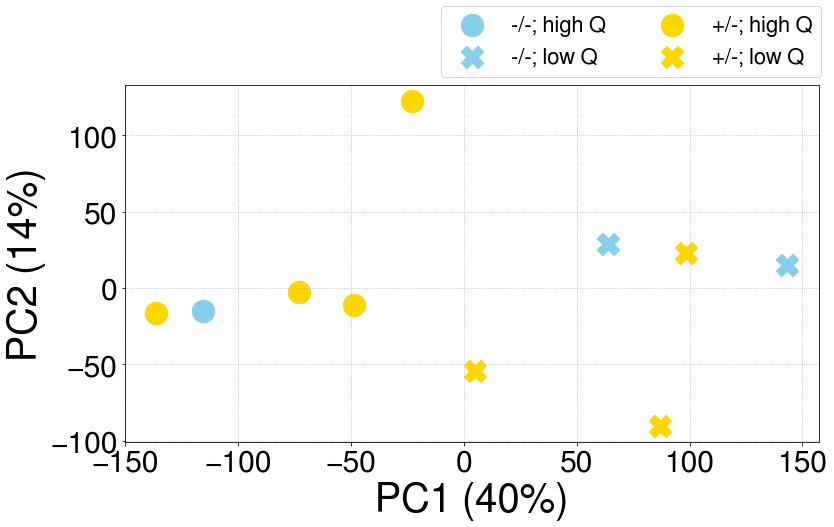

In [19]:
colors = ['skyblue', 'skyblue', 'skyblue', 'gold', 'gold', 'gold', 'gold', 'gold', 'gold', 'gold']
markers = ['o', 'X', 'X', 'X', 'o', 'o', 'o', 'X', 'o', 'X']
labels = ['-/-; high Q', '-/-; low Q', None, None, '+/-; high Q', None, None, '+/-; low Q', None, None]

for i in range(len(colors)):
    matplotlib.pyplot.scatter(principalDf.loc[i, 'PC1'], principalDf.loc[i, 'PC2'], c=colors[i], s=500, marker=markers[i], label=labels[i])

matplotlib.pyplot.xlabel('PC1 ({:.0f}%)'.format(pca.explained_variance_ratio_[0]*100))
matplotlib.pyplot.ylabel('PC2 ({:.0f}%)'.format(pca.explained_variance_ratio_[1]*100))
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.legend(ncol=2, fontsize=22, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

# 5. Is BRCA2 there?

In [20]:
selected_genes = ['ENSG00000012048', 'ENSG00000139618', 'ENSG00000075624', 'ENSG00000111640'] # brca1, brca2, b-actin, GAPDH
toplot = substantial[selected_genes]
(2**toplot)-1

,ENSG00000012048,ENSG00000139618,ENSG00000075624,ENSG00000111640
nn.1,8.570510,5.146791,1880.359097,561.856422
nn.0,2.195161,1.199067,5166.173408,549.673418
nn.0,3.143401,0.772537,4183.171987,392.208289
pn.0,7.324915,1.042979,2259.812899,1869.746636
pn.1,11.621466,2.970562,3065.665732,880.045259
pn.1,10.122918,0.513081,1868.887159,1517.946137
pn.1,10.547437,5.720131,3320.235840,1419.360452
pn.0,5.720680,0.655104,1844.184374,2207.829481
pn.1,13.949759,1.898026,1665.800781,784.760665
pn.0,5.797847,1.165236,1429.524838,308.227217
